In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *

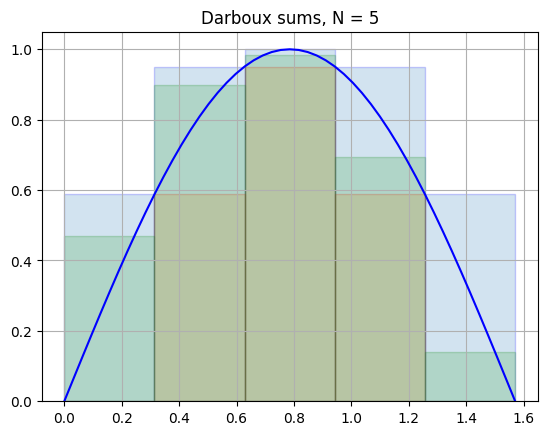

In [2]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 5 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

U_sum, L_sum, R_sum = 0, 0, 0 # считаем суммы
for i in y_upper:
  U_sum += i*(b-a)/N
for i in y_lower:
  L_sum += i*(b-a)/N
for i in y_rand:
  R_sum += i*(b-a)/N

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [3]:
df = pd.DataFrame(data=[U_sum,L_sum,R_sum],index=["Верхняя Дарбу","Нижняя Дарбу","Интегральная сумма со случайным оснащением"],columns = ['N = {}'.format(N)])
df

,N = 5
Верхняя Дарбу,1.280851
Нижняя Дарбу,0.668100
Интегральная сумма со случайным оснащением,1.001196


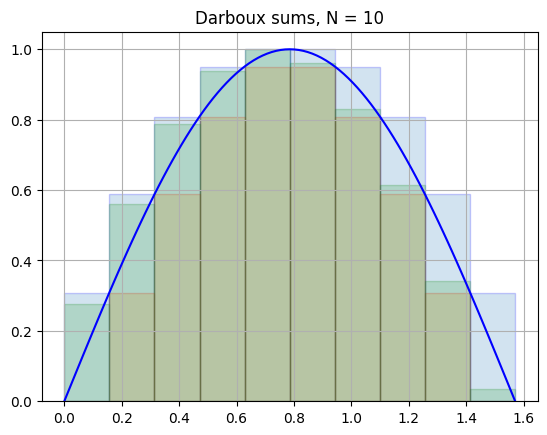

In [4]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 10 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

U_sum, L_sum, R_sum = 0, 0, 0 # считаем суммы
for i in y_upper:
  U_sum += i*(b-a)/N
for i in y_lower:
  L_sum += i*(b-a)/N
for i in y_rand:
  R_sum += i*(b-a)/N

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [5]:
df = pd.DataFrame(data=[U_sum,L_sum,R_sum],index=["Верхняя Дарбу","Нижняя Дарбу","Интегральная сумма со случайным оснащением"],columns = ['N = {}'.format(N)])
df

,N = 10
Верхняя Дарбу,1.148841
Нижняя Дарбу,0.834682
Интегральная сумма со случайным оснащением,0.996640


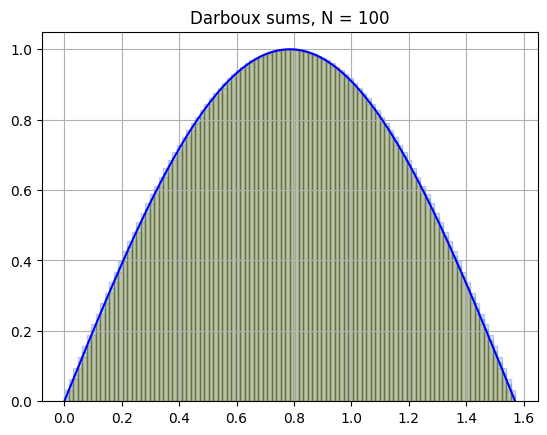

In [6]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 100 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

U_sum, L_sum, R_sum = 0, 0, 0 # считаем суммы
for i in y_upper:
  U_sum += i*(b-a)/N
for i in y_lower:
  L_sum += i*(b-a)/N
for i in y_rand:
  R_sum += i*(b-a)/N

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [7]:
df = pd.DataFrame(data=[U_sum,L_sum,R_sum],index=["Верхняя Дарбу","Нижняя Дарбу","Интегральная сумма со случайным оснащением"],columns = ['N = {}'.format(N)])
df

,N = 100
Верхняя Дарбу,1.015626
Нижняя Дарбу,0.984210
Интегральная сумма со случайным оснащением,1.000040
